 Task1: Predict Restaurant Ratings

Mean Squared Error (Decision Tree): 0.174


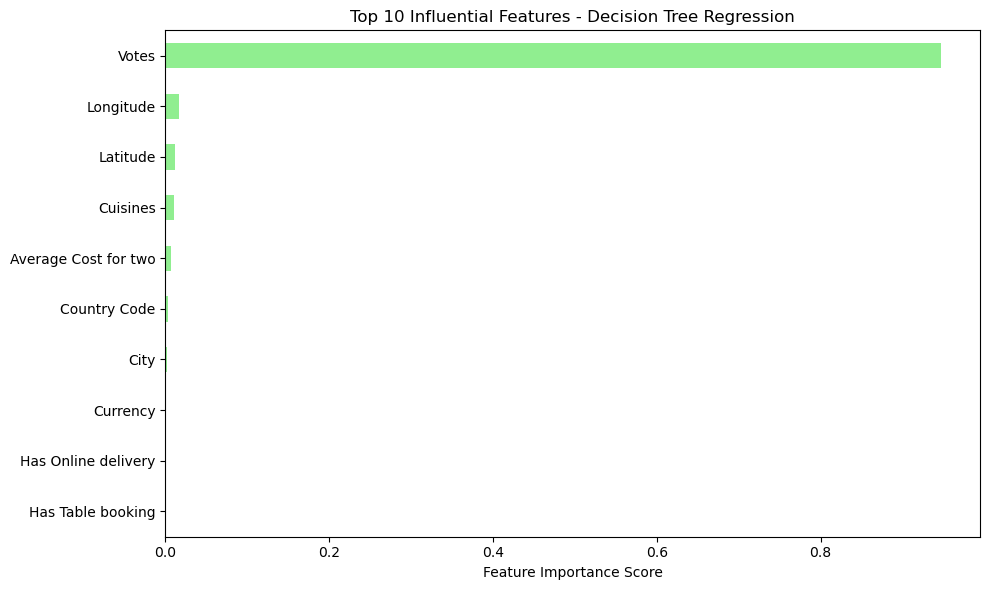

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Dataset .csv")

# Drop irrelevant columns
columns_to_drop = [
    "Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose",
    "Rating color", "Rating text"
]
df_cleaned = df.drop(columns=columns_to_drop)
# Handle missing values
df_cleaned = df_cleaned.dropna()

# Encode categorical variables
categorical_cols = df_cleaned.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Define features and target
X = df_cleaned.drop(columns=['Aggregate rating'])
Y = df_cleaned['Aggregate rating']

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

# Make predictions and evaluate using MSE
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (Decision Tree): {mse:.3f}")

# Analyze feature importance
feature_importance = pd.Series(tree_reg.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 influential features
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh', color='lightgreen')
plt.gca().invert_yaxis()
plt.title('Top 10 Influential Features - Decision Tree Regression')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

 Task2: Restaurant Recommendation

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("Dataset .csv")

# Drop rows with missing 'Cuisines'
df = df.dropna(subset=['Cuisines'])

# Use only relevant columns
columns_to_use = ['Restaurant Name', 'Cuisines', 'Price range', 'Average Cost for two', 'Has Online delivery']
df_filtered = df[columns_to_use].copy()

# Fill any remaining missing values
df_filtered = df_filtered.fillna('Unknown')

# Convert 'Has Online delivery' to binary
df_filtered['Has Online delivery'] = df_filtered['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Combine selected features into a single string for each restaurant
df_filtered['combined_features'] = (
    df_filtered['Cuisines'].astype(str) + ' ' +
    df_filtered['Price range'].astype(str) + ' ' +
    df_filtered['Average Cost for two'].astype(str) + ' ' +
    df_filtered['Has Online delivery'].astype(str)
)

# Define user preferences
user_pref = {
    'Cuisines': 'North Indian',
    'Price range': 2,
    'Average Cost for two': 600,
    'Has Online delivery': 1 
}

# Filter restaurants that meet the 'Has Online delivery' condition
filtered_df = df_filtered[df_filtered['Has Online delivery'] == user_pref['Has Online delivery']].reset_index(drop=True)

# Vectorize restaurant features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_filtered = tfidf.fit_transform(filtered_df['combined_features'])

# Create a combined string for user input
user_input = f"{user_pref['Cuisines']} {user_pref['Price range']} {user_pref['Average Cost for two']}"

# Vectorize user input
user_vec = tfidf.transform([user_input])

# Compute similarity and recommend
similarity_scores = cosine_similarity(user_vec, tfidf_matrix_filtered).flatten()
top_indices = similarity_scores.argsort()[-10:][::-1]

# Display top recommendations
recommendations = filtered_df.iloc[top_indices]
print("Top 10 Recommended Restaurants Based on User Preferences (Online Delivery Required):\n")
print(recommendations[['Restaurant Name', 'Cuisines', 'Price range', 'Average Cost for two', 'Has Online delivery']].reset_index(drop=True))

Top 10 Recommended Restaurants Based on User Preferences (Online Delivery Required):

             Restaurant Name      Cuisines  Price range  Average Cost for two  \
0                Kohli Dhaba  North Indian            2                   600   
1              Kake Da Hotel  North Indian            2                   600   
2                 Curry Haus  North Indian            2                   600   
3            Kabab And Tadka  North Indian            2                   600   
4          Singh Tawa Corner  North Indian            2                   600   
5          Khalsa Restaurant  North Indian            2                   600   
6  Sher 'A' Punjab Bhojnalya  North Indian            2                   600   
7                   Oberoi's  North Indian            2                   600   
8              Kukkad Nukkad  North Indian            2                   600   
9               Roti Te Boti  North Indian            2                   600   

   Has Online delivery

Task3: Cuisine Classification


 Classification Report:

                 precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         1
       American       0.21      0.36      0.27        55
         Andhra       0.00      0.00      0.00         1
          Asian       0.00      0.00      0.00        17
   Asian Fusion       0.00      0.00      0.00         1
            BBQ       0.00      0.00      0.00         5
         Bakery       0.19      0.13      0.15       109
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         4
      Beverages       0.00      0.00      0.00        13
        Biryani       0.00      0.00      0.00        22
      Brazilian       0.25      0.25      0.25         4
      Breakfast       0.00      0.00      0.00         3
        British       0.00      0.00      0.00         4
         Burger       0.00      0.00      0.00        31
        Burmese       0.00      0.00      0.00         1
    

C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


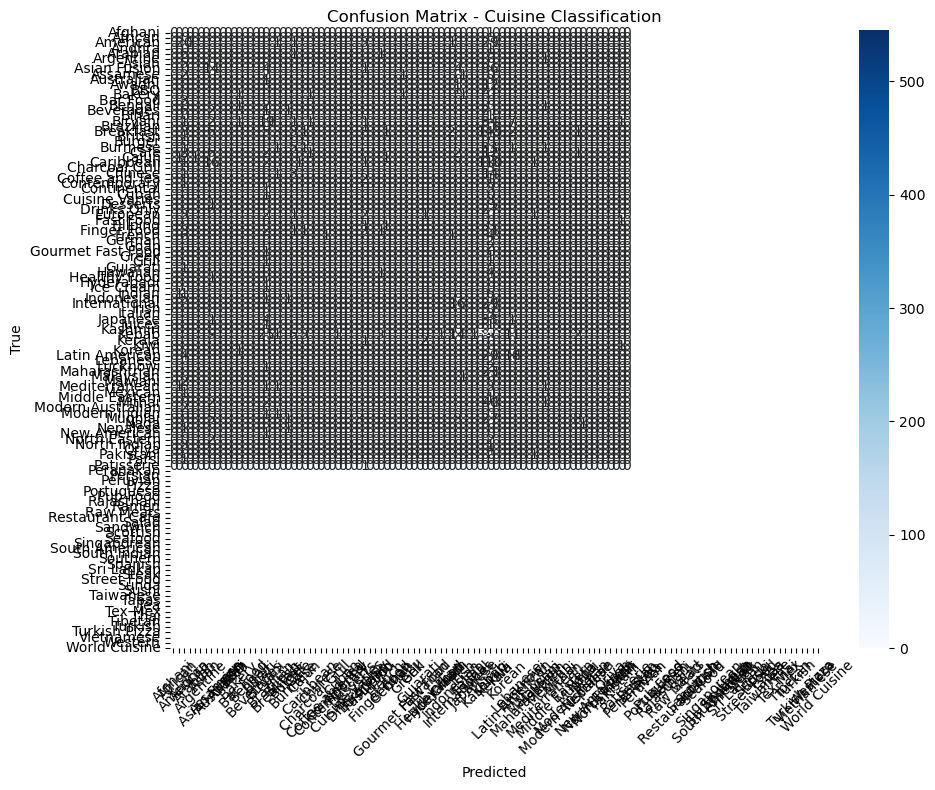


 Model Accuracy: 0.34


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset .csv")

# Preprocessing
# Drop rows with missing cuisine or target features
df = df.dropna(subset=['Cuisines', 'Price range', 'Average Cost for two', 'Has Online delivery'])

# For simplicity, take only the first cuisine listed (if multiple are comma-separated)
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Convert 'Has Online delivery' to binary
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode target (Cuisine)
le_cuisine = LabelEncoder()
df['Cuisine_Label'] = le_cuisine.fit_transform(df['Cuisines'])

# Select features and target
X = df[['Price range', 'Average Cost for two', 'Has Online delivery']]
Y = df['Cuisine_Label']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Evaluate the model
y_pred = model.predict(X_test)

#Classification report (only for labels in y_test)
labels_in_test = sorted(list(set(Y_test)))
target_names_in_test = le_cuisine.inverse_transform(labels_in_test)

print("\n Classification Report:\n")
print(classification_report(Y_test, y_pred, labels=labels_in_test, target_names=target_names_in_test))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=le_cuisine.classes_, yticklabels=le_cuisine.classes_, 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Cuisine Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.2f}")


Task4: Location-based Analysis

Interactive map saved as 'restaurant_map.html'

 Top Locations by Number of Restaurants:
              Restaurant Count  Average Rating  Average Price Range
City                                                               
New Delhi                 5473        2.438845             1.621597
Gurgaon                   1118        2.651431             1.855993
Noida                     1080        2.036204             1.601852
Faridabad                  251        1.866932             1.454183
Ghaziabad                   25        2.852000             1.800000
Bhubaneshwar                21        3.980952             1.857143
Lucknow                     21        4.195238             2.571429
Amritsar                    21        3.685714             1.809524
Ahmedabad                   21        4.161905             2.571429
Guwahati                    21        4.190476             2.523810


C:\Users\gayat\AppData\Local\Temp\ipykernel_3092\3197115656.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_stats.head(10).reset_index(),


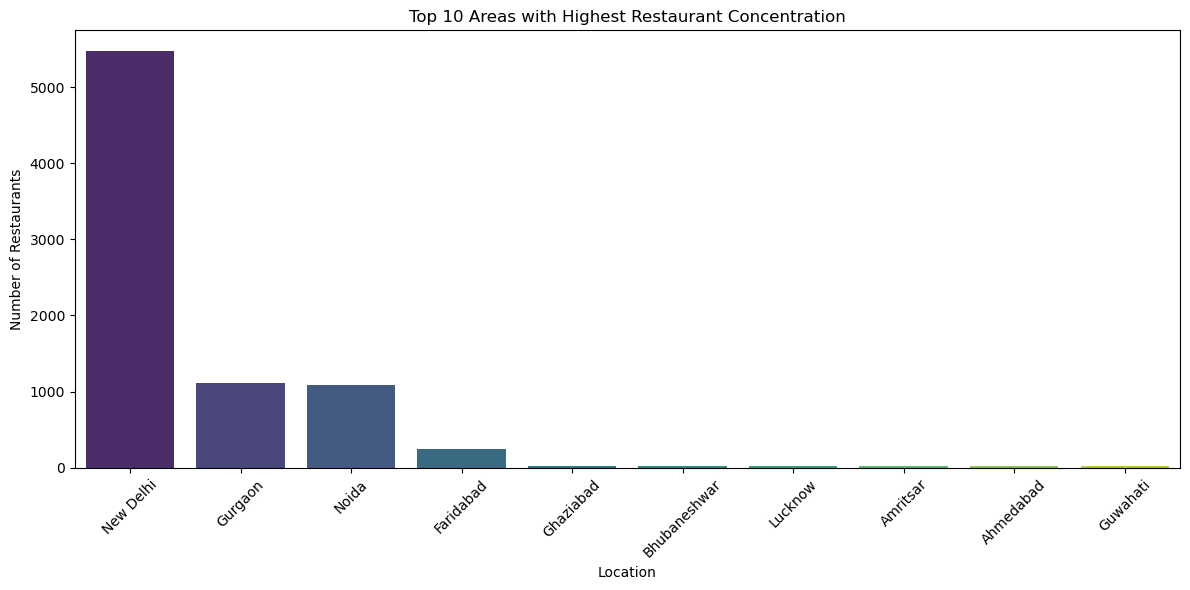

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Load dataset
df = pd.read_csv("Dataset .csv")

# Drop rows with missing geolocation
df = df.dropna(subset=['Latitude', 'Longitude'])

# Basic map visualization using Folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['Cuisines']}) - Rating: {row['Aggregate rating']}",
        icon=folium.Icon(color="blue", icon="cutlery", prefix="fa")
    ).add_to(marker_cluster)

# Save the map
restaurant_map.save("restaurant_map.html")
print("Interactive map saved as 'restaurant_map.html'")

# Group by City or Locality
if 'City' in df.columns:
    group_col = 'City'
elif 'Locality' in df.columns:
    group_col = 'Locality'
else:
    raise ValueError("No 'City' or 'Locality' column found.")

# Group and analyze
location_stats = df.groupby(group_col).agg({
    'Restaurant Name': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).rename(columns={
    'Restaurant Name': 'Restaurant Count',
    'Aggregate rating': 'Average Rating',
    'Price range': 'Average Price Range'
}).sort_values('Restaurant Count', ascending=False)

print("\n Top Locations by Number of Restaurants:")
print(location_stats.head(10))

# Visualize restaurant concentration
plt.figure(figsize=(12, 6))
sns.barplot(data=location_stats.head(10).reset_index(),
            x=group_col, y='Restaurant Count', palette="viridis")
plt.xticks(rotation=45)
plt.title('Top 10 Areas with Highest Restaurant Concentration')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()
